In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form style="text-align:right;"action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



#Monte-Carlo Integration#

So far, we have learned multiple ways to both approximate and evaluate definite integrals. The most ubiquitous of these methods, called the **Riemann Sum**, estimates the bounded area of a curve $f(x)$ by adding together a sequence of rectangles with width $\Delta x$ and height $f(x)$ 

###$$ \sum f(x)\, \Delta x$$###

By increasing the number of these rectangles while proportionally shrinking their width, this method approximates the definite integral by calculating the sum of these rectangles.

Developed as a tool for particle simulation during the Manhattan Project, the Monte-Carlo method **relies on random number generation to efficiently approximate numerical values of difficult integrals** and other tricky mathematical problems. The name "Monte-Carlo", also the codename for the project, was inspired by the Polish mathemetician Stanislaw Ulam whose uncle would gamble away his relatives money at the casino in Monte-Carlo. Unlike Ulam's uncle, however, the Monte-Carlo method of integration has a far greater success rate.

The theory behind the Monte-Carlo method, and more specifically Monte-Carlo integration, can be likened to a game of darts. Imagine a dartboard with an area $A'$ and a curve $C$ of area $A$ within our dartboard:

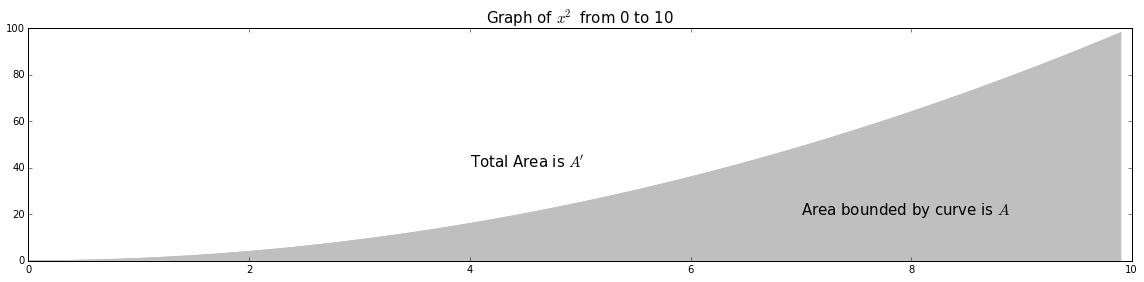

In [9]:
%matplotlib inline
from __future__ import division
import random as rand
import math
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)

title_font = 15

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(111)
x = np.arange(0, 10, 0.1);
y = np.power(x, 2)
ax1.set_title("Graph of $x^2$ from 0 to 10", fontsize=title_font)
plt.annotate('Area bounded by curve is $A$ ', xy=(7, 20), fontsize=title_font)
plt.annotate("Total Area is $A'$", xy=(4, 40), fontsize=title_font)
plt.fill_between(x, y, 0, color='0.75')
plt.plot(x, y, color='0.75')
fig.tight_layout()

Now let us take a handful of "darts" and throw them at this dartboard. If these darts land randomly on the board, the ratio of the number of darts that land within the bounds of the curve to the total number of darts should nearly be **equivalent to the ratio of the area bounded by curve and the total area of the board**. Where $N$ is number of darts bounded by the curve and $N'$ the total number of darts,

###$$ \frac{A}{A'} = \frac{N}{N'}$$###

So we can find the area bounded by the curve that intersects the dartboard by solving for $A$:

###$$ A = \frac{N}{N'}A'$$###

It is apparent here that the more "darts" are thrown at the board, the more accurate the measurement of the area bounded by the curve between an interval, also known as a definite integral, becomes. Let us now attempt to estimate the integral of $x^2$ in the interval 1 to 10 using the Monte-Carlo method of integration with 1000 'darts'. This first algorithm only works with positive functions. Note that the value of this definite integral provided by Wolfram Alpha is 333.33. 

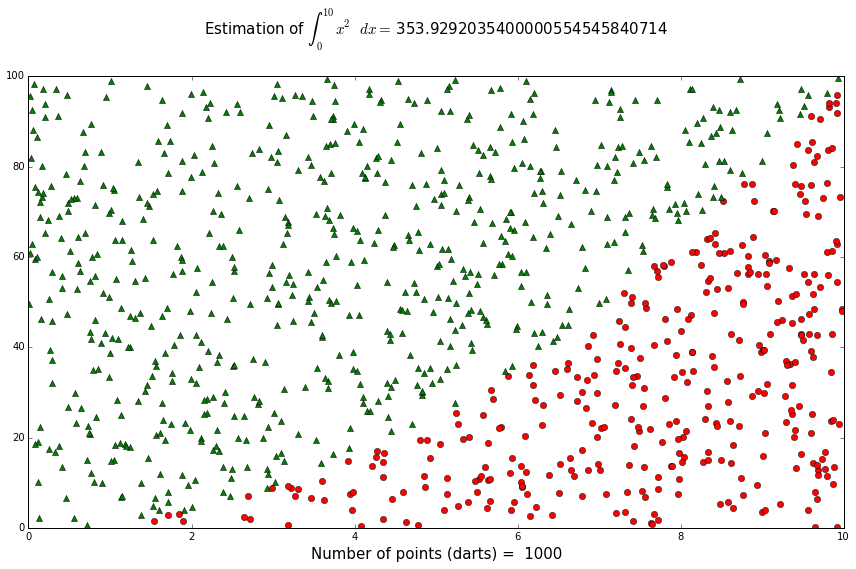

In [10]:
# basic monte carlo integration (must be a positive function)
# see full source in monte.py in CWD
def monte_carlo(function, darts, start, end):
    runs = darts
    points = []
    
    # base of A' from a -> b
    a = start
    b = end
    
    # top of the 'dartboard'
    top = get_max_value(function, a, b)
    # bottom of the 'dartboard'
    bottom = get_min_value(function, a, b)
    
    
    # generate random x and y; check if y value is bounded by f(x) or not
    # counting array: x-position, y-position, bounded by curve (bool)
    for i in range(runs):
        x = a  + rand.random() * (b-a)
        y = rand.random() * abs(top-bottom) + bottom
        if y >= 0:
            if y <= function(x):
                points.append([x,y,True])
            else:
                points.append([x,y,False])
        if y < 0:
            if y >= function(x):
                points.append([x,y,True])
            else:
                points.append([x,y,False])

    area = 0
    area_prime = abs(b-a) * abs(top-bottom)
    points_within = 0
    points_outside = 0
    
    # count the points bounded and unbounded by the curve
    for i in points:
        if i[2]:
            points_within += 1
        elif not i[2]:
            points_outside += 1
    
    # calculate the best estimate of the integral using our previous formula: A = N/N' * A'
    area = (Decimal(points_within) / Decimal(points_outside + points_within)) * Decimal(area_prime)

    x_points_in, y_points_in, x_points_out, y_points_out = ([] for i in range(4))
    
    # add points for plotting
    for i in points:
        if i[2]:
            x_points_in.append(i[0])
            y_points_in.append(i[1])
        elif not i[2]:
            x_points_out.append(i[0])
            y_points_out.append(i[1])
        
    
    
    return dict(x_points_in=x_points_in, 
                y_points_in=y_points_in, 
                x_points_out=x_points_out, 
                y_points_out=y_points_out,
                integration=area,
                darts=runs)

# display the result 
fig = plt.figure(figsize=(12,8))
squared = lambda x: x**2

ax1 = fig.add_subplot(111)
result = monte.monte_carlo(squared, 1000, 0, 10)
ax1.plot(result['x_points_in'] , result['y_points_in'] , 'ro' )
ax1.plot(result['x_points_out'] , result['y_points_out'] , 'g^' )
ax1.set_title("Estimation of $\int_0^{10} x^2\, dx =$ " +  str(result['integration']),y=1.08, fontsize=15)
ax1.set_ylabel('', y=1.08)
ax1.set_xlabel("Number of points (darts) =  " + str(result['darts']), fontsize=15)

# adjust layout
fig.tight_layout()

In this graph, the red circles represent the "darts" (hereby referred to as points) that are bounded by the curve. In the algorithm, this condition is satisfied when $y < f(x)$ for a randomly generated point $(x,y)$. The green triangles represent those points unbounded by the curve. This condition is satisfied when $y > f(x)$ for a similar point $(x,y)$. With only 1,000 points used in this Monte-Carlo integration (hereby referred to as iterations), we can clearly see that the estimated value of this definite integral will not even come close to the exact value. And because of the random nature of Monte-Carlo integration, estimating the percent-error of a calculation is more difficult with fewer iterations. Thus the percent-error of a Monte-Carlo integration with only 1,000 iterations fluctuates greatly across calculations. Now let's up the ante and try estimating this same definite integral with 10,000 and 100,000 iterations a piece:

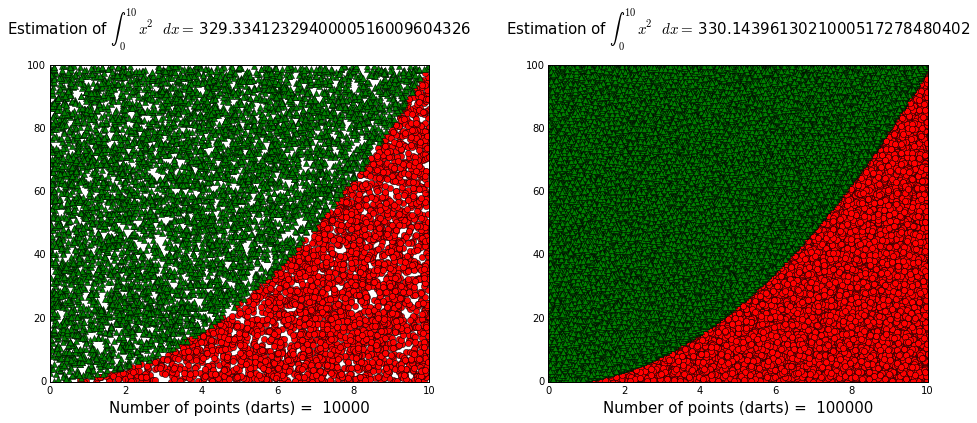

In [11]:
# see file 'monte.py' in CWD for all source code
import monte
fig = plt.figure(figsize=(14,6))
squared = lambda x: x**2 # f(x)

# graph 1
ax1 = fig.add_subplot(121)
result = monte.monte_carlo(squared, 10000, 0, 10)
ax1.plot(result['x_points_in'] , result['y_points_in'] , 'ro' )
ax1.plot(result['x_points_out'] , result['y_points_out'] , 'g^' )
ax1.set_title("Estimation of $\int_0^{10} x^2\, dx =$ " +  str(result['integration']),y=1.08, fontsize=15)
ax1.set_ylabel('', y=1.08)
ax1.set_xlabel("Number of points (darts) =  " + str(result['darts']), fontsize=15)

# graph 2
ax2 = fig.add_subplot(122)
result = monte.monte_carlo(squared, 100000, 0, 10)
ax2.plot(result['x_points_in'] , result['y_points_in'] , 'ro' )
ax2.plot(result['x_points_out'] , result['y_points_out'] , 'g^' )
ax2.set_title("Estimation of $\int_0^{10} x^2\, dx =$ " +  str(result['integration']),y=1.08, fontsize=15)
ax2.set_ylabel('', y=1.08)
ax2.set_xlabel("Number of points (darts) =  " + str(result['darts']), fontsize=15)

# adjust layout
fig.tight_layout()

##Accuracy and Efficiency of the Monte-Carlo Method##

With ten calculations using 100,000 iterations each, the percent error of the approximation hovers around 0.01%. That is commendable accuracy with a relatively lightweight computation. We can now grasp the ability of the Monte-Carlo method to effectively estimate the value of a definite integral, but how many iterations are necessary to maximize accuracy and efficiency? The first graph below shows the average error of 250 separate Monte-Carlo integrations of this same definite integral based on the number of iterations in each calculation. The second graph compares the average time for a single calculation with the number of iterations per calculation.

In [12]:
# see file 'monte.py' in CWD for all source
import monte
squared = lambda x: x**2

# for percentage error calc
x_values = range(500,10000,250)
y_values = []

# average_error runs the monte_carlo (# of sample determined by fifth param)
# method averages the error of x number of iterations
for x in x_values:
    y_values.append(monte.average_error(squared, x, 0, 10, 100, 333.33))

# for time calc
x2_values = range(500,10000,250)
y2_values = []

# average_error runs the monte_carlo method averages the error of x number of iterations
for x in x2_values:
    y2_values.append(monte.average_time(squared, x, 0, 10, 100))
    

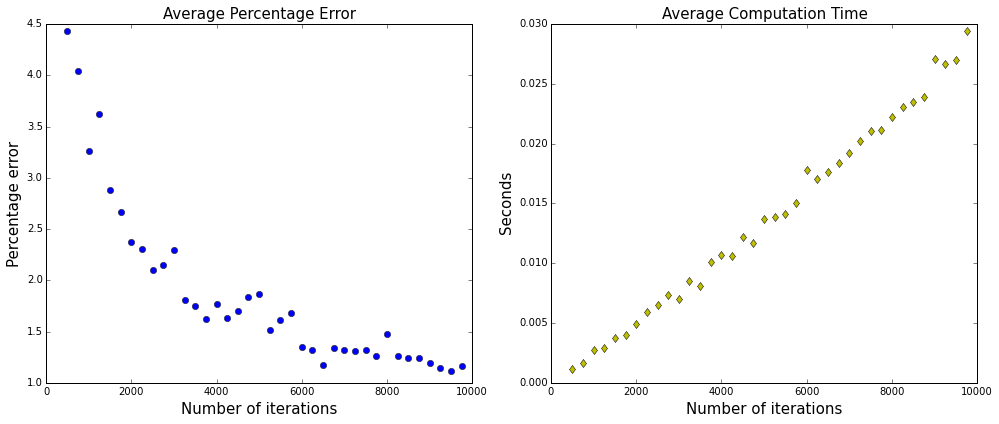

In [15]:
from numpy import *

fig = plt.figure(figsize=(14,6))

# display plot1
ax1 = fig.add_subplot(121)
ax1.plot(x_values , y_values , 'bo' )
ax1.set_title("Average Percentage Error", fontsize=15)
ax1.set_ylabel('Percentage error', fontsize=15)
ax1.set_xlabel("Number of iterations", fontsize=15)

#display plot 2
ax2 = fig.add_subplot(122)
ax2.plot(x2_values , y2_values , 'yd')
ax2.set_title("Average Computation Time", fontsize=15)
ax2.set_ylabel('Seconds', fontsize=15)
ax2.set_xlabel("Number of iterations", fontsize=15)

# adjust layout
fig.tight_layout()

As shown is this graph, the accuracy increases with a greater number of iterations. But with a greater number of calculations comes a greater computational cost. Thus, the intersection of these datasets should yield the **greatest** accuracy and **smallest** computation time for a certain number of iterations. Let's try to fit both of these curves in order to find this 'effective' iteration value. The average percentage error data clearly looks non-linear, but vaguely logarithmic to the eye. By taking the natural logarithm of all y-values, finding the linear regression of the new data and ascertaining an $R^2$ for the fitted curve, we can see compelling evidence of a logarithmic trend. Let's also perform a linear resgression on the plot of average computing time while we're at it.

R-squared value for average percent error: 0.848923357607
R-squared value for average computation time: 0.993039242164


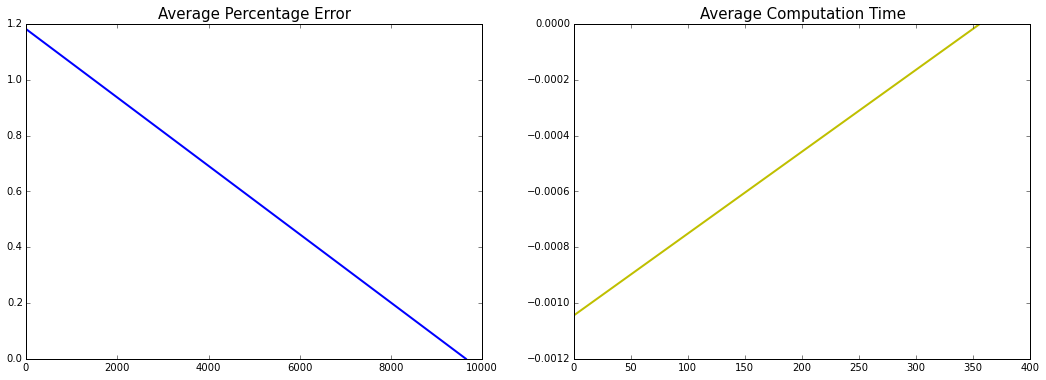

In [38]:
from scipy import stats
from shapely.geometry import LineString

logx = lambda x: math.log(x, math.e)
chfloat = lambda x: float(x)
y_values = map(chfloat, y_values)
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)

# apply logarithm to all y_values
logy_values = map(logx, y_values)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,logy_values)
ax1.plot([0, -1 * intercept / slope], [intercept, 0], color='b', linestyle='-', linewidth=2)
ax1.set_title("Average Percentage Error", fontsize=15)
line1 = LineString([(0, -1 * intercept / slope), (intercept, 0) ])

# display r-squared value
print "R-squared value for average percent error: " + str(r_value**2)

ax2 = fig.add_subplot(122)
slope, intercept, r_value, p_value, std_err = stats.linregress(x2_values,y2_values)
line2 = LineString
ax2.plot([0, -1 * intercept / slope], [intercept, 0], color='y', linestyle='-', linewidth=2)
ax2.set_title("Average Computation Time", fontsize=15)


# display r-squared value
print "R-squared value for average computation time: " + str(r_value**2)

##Monte-Carlo Integration, Take 2... ##

The Monte-Carlo method is a generalized name for any mathematical process by which random numbers are used to approximate definite quantities. It follows that there also different processes than the previous can use the Monte-Carlo method to approximate the value of a definite integral. Let's begin by looking at the **average value theorem**, which states that the average value of a function $f$ between an interval $a$ and $b$ is equivalent to the area bounded by the curve divided by the width of the integral: 

$$ f_{avg} =  \frac{1}{\lvert b-a \rvert}\int_a^b f(x) \, dx $$

We can rearrange the previous equation to reach

$$ \int_a^b f(x) \, dx = f_{avg} \cdot \lvert b - a \rvert$$

That seems pretty simple, but it is not obvious to see where the Monte-Carlo method comes into play. In order to approximate the value of $f_{avg}$, random values of $x$ are selected and the values of each $f(x)$ are averaged. The benefits of this algorithm over the previous are also not immediately apparent. Notice how in this method of integration, there is no need to know any extra information (including zeroes, maximums, or minimums) besides the interval of integration and the function itself. This quality yields a substantial advantage when dealing with tricky, multidimensional integrals, but how does its performance and accuracy stand up to the previously described method? Time to benchmark!

In [27]:
# using average value theorem and monte-carlo method to evaluate definite integral x^2 from 0 to 10
def monte_carlo_avg_val(function, runs, start, end):
    # value lists
    x_values = []
    y_values = []
    
    # total for calc of average value
    total = 0
    
    # bounds of integration
    a = start
    b = end
    
    # generate random x values and calculate function values
    # Append data to value lists
    for i in range(runs):
        x = a  + rand.random() * (b-a)
        x_values.append(x)
        y_values.append(function(x))
        
    for val in y_values:
        total += val
        
    # average function value
    average = total / len(y_values)
    
    return average * abs(b-a)

print "result of integration = ",monte_carlo_avg_val(lambda x: x**2, 100000, 0, 10)

result of integration =  333.308941566


If you recall from the previous example, the value of this definite integral given by Wolfram Alpha is 333.333, so this alternate method with the same number of iterations seems to give us a reasonable result.

##Applications of Monte-Carlo integration##

With this new method in place to evaluate definite integrals, let's get our hands dirty and dive right in! Let us start by looking at functions that are tricky to evaluate with traditional techniques. Here is the first "tricky integral": $$\int e^{-x^2} \, dx $$

The graph below shows the Monte-Carlo approximation of this integral using 100,000 iterations in the interval 0 to 1. Wolfram alpha gives 

Estimation of the integral using MC2:  0.746893654725


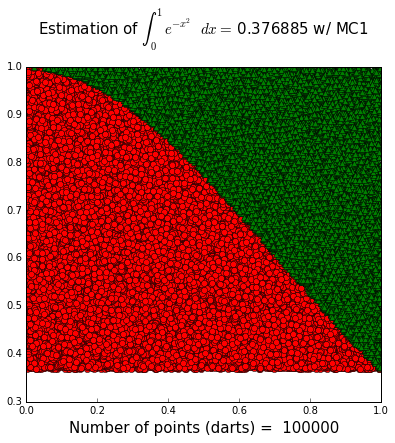

In [6]:
import monte

fig = plt.figure(figsize=(14,6))
func = lambda x: math.e**(-1 * x**2)

# integration of e^(-x^2) using the first monte-carlo method (MC1)
ax = fig.add_subplot(121)
result = monte.monte_carlo_neg(func, 100000, 0, 1)
ax.plot(result['x_points_in'] , result['y_points_in'] , 'ro' )
ax.plot(result['x_points_out'] , result['y_points_out'] , 'g^' )
ax.set_title("Estimation of $\int_0^{1} e^{-x^2}\, dx =$ " +  str(result['integration'].quantize(Decimal('.000001'), 
            rounding=ROUND_DOWN)) + " w/ MC1",y=1.08, fontsize=15)
ax.set_ylabel('', y=1.08)
ax.set_xlabel("Number of points (darts) =  " + str(result['darts']), fontsize=15)

# integration of e^(-x^2) using the second monte-carlo method (MC2)
result = monte.monte_carlo_avg_val(func, 100000, 0, 1)
print "Estimation of the integral using MC2: ", result


That seems pretty straight forward, but it is hard to judge the abilities of our two Monte-Carlo methods without any comparison to more traditional methods of evaluating definite integrals. Recall the very first days of integral calculus and the orginal nails-on-a-chalkboard process of estimating definite integrals with **Riemann Sums**. Also recall three different ways to approximate the integral by this method of finding the area of 'boxes' under the curve: left-hand sums, right-hand sums, and midpoint sums. 

In [44]:
# riemann sum (type = [righthand, lefthand, midpoint)
# see full source in monte.py
from decimal import *
def riemann_sum(function, divisions, start, end, method):
    x = start
    area = 0
    division = 1.0 * divisions
    dx = Decimal(abs(start-end)) / Decimal(divisions)
    if method == 'lefthand':
        for i in range(divisions):
            area += dx * function(x)
            x += dx
    elif method == 'righthand':
        for i in range(divisions):
            x += dx
            area += dx * function(x)
    elif method == 'midpoint':
        for i in range(divisions):
            area += dx * function(x + dx/2)
            x += dx
    else:
        return "error, method fault [lefthand, righthand or midpoint]"
    return area
print "monte-carlo method 1: ",
print "monte-carlo method 2: ",
print "righthand sum: ", riemann_sum(lambda x: x**2, 100000, 0, 10, 'righthand')
print "lefthand sum: ", riemann_sum(lambda x: x**2, 100000, 0, 10, 'lefthand')
print "midpoint sum: ", riemann_sum(lambda x: x**2, 100000, 0, 10, 'midpoint')

righthand sum:  333.338333350000
lefthand sum:  333.328333350000
midpoint sum:  333.33333332500000


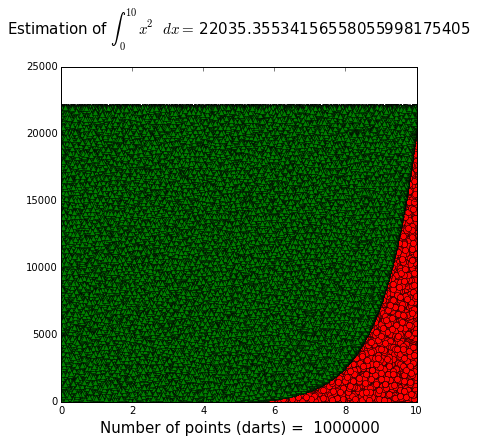

In [35]:
import monte
fig = plt.figure(figsize=(14,6))
func = lambda x: math.e**x

ax1 = fig.add_subplot(121)
result = monte.monte_carlo(func, 1000000, 0, 10)
ax1.plot(result['x_points_in'] , result['y_points_in'] , 'ro' )
ax1.plot(result['x_points_out'] , result['y_points_out'] , 'g^' )
ax1.set_title("Estimation of $\int_0^{10} x^2\, dx =$ " +  str(result['integration']),y=1.08, fontsize=15)
ax1.set_ylabel('', y=1.08)
ax1.set_xlabel("Number of points (darts) =  " + str(result['darts']), fontsize=15)

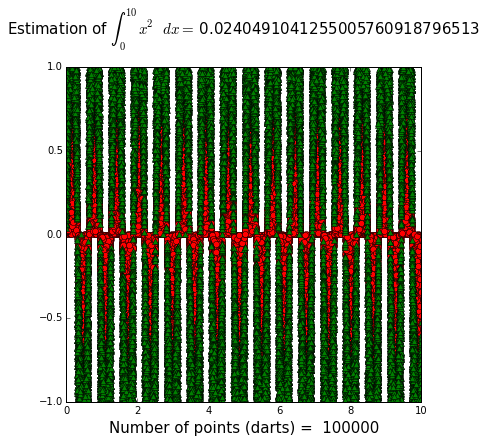

In [30]:
import monte

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
func = lambda x: math.sin(10*x)
result = monte.monte_carlo_neg(func,100000,0,10)
ax1.plot(result['x_points_in'] , result['y_points_in'] , 'ro' )
ax1.plot(result['x_points_out'] , result['y_points_out'] , 'g^' )
ax1.set_title("Estimation of $\int_0^{10} x^2\, dx =$ " +  str(result['integration']),y=1.08, fontsize=15)
ax1.set_ylabel('', y=1.08)
ax1.set_xlabel("Number of points (darts) =  " + str(result['darts']), fontsize=15)

####Sources####

1. http://copingwithcomputers.com/2013/06/20/monte-carlo-integration/
2. http://farside.ph.utexas.edu/teaching/329/lectures/node109.html
3. 